# Рубежный контроль №1

## Тема: Технологии разведочного анализа и обработки данных.

## Выполнил: Фонин Максим Алексеевич ИУ5-61Б

Вариант 17

Номер задачи: 3 </br>
Для заданного набора данных произведите масштабирование данных (для одного признака) и преобразование категориальных признаков в количественные двумя способами (label encoding, one hot encoding) для одного признака. Какие методы Вы использовали для решения задачи и почему?

Доп. требования по группе: </br>
для пары произвольных колонок данных построить график "Диаграмма рассеяния".

Номер набора данных: 1 </br>
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris

In [1]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Загрузим данные в pandas.DataFrame
data = load_iris()
df = pd.DataFrame(data=data.data, columns=data.feature_names)

In [3]:
# Посмотрим информацию о датафрейме
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [4]:
# Первые 5 записей датасета
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
# Проверка на количество пропусков в каждом столбце
df.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [6]:
# Проверка на повторяющиеся значения
df.duplicated().sum()

1

In [7]:
# Удаление повторяющихся записей
df = df.drop_duplicates()
df.duplicated().sum()

0

In [8]:
df.shape

(149, 4)

## Масштабирование методом MinMaxScaler()

In [9]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[['sepal length (cm)']])

### Сравним данные до и после масштабирования

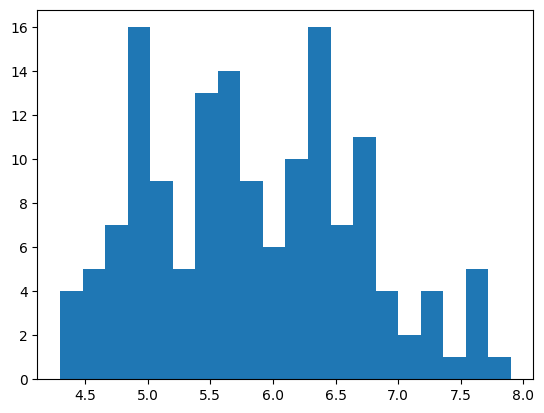

In [10]:
# До масштабирования
plt.hist(df['sepal length (cm)'], 20)
plt.show()

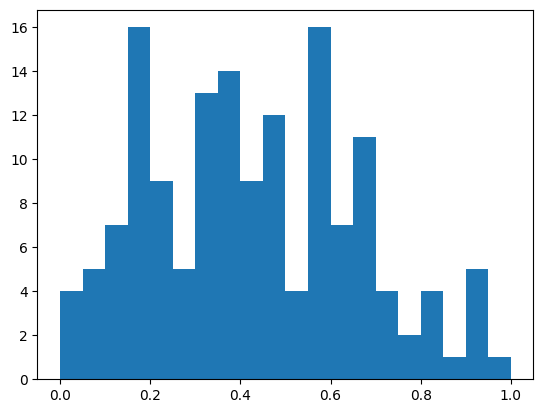

In [11]:
# После масштабирования
plt.hist(scaled_data, 20)
plt.show()

In [12]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Преобразование категориального признака

В исходном датасете нет категориального признака. Сгенерируем список случайных цветов и добавим его к датасету.

In [13]:
df.shape

(149, 4)

In [14]:
from random import randint

colors = ['white', 'purple', 'blue', 'yellow'] # список цветов
colors_array = [colors[randint(0, len(colors) - 1)] for _ in range(df.shape[0])] # генератор списка случайных цветов
colors_array

['blue',
 'purple',
 'white',
 'white',
 'white',
 'purple',
 'yellow',
 'white',
 'white',
 'white',
 'purple',
 'purple',
 'purple',
 'yellow',
 'blue',
 'yellow',
 'purple',
 'blue',
 'yellow',
 'purple',
 'blue',
 'purple',
 'yellow',
 'yellow',
 'purple',
 'yellow',
 'purple',
 'white',
 'blue',
 'yellow',
 'purple',
 'purple',
 'yellow',
 'blue',
 'blue',
 'blue',
 'yellow',
 'purple',
 'yellow',
 'white',
 'purple',
 'white',
 'white',
 'purple',
 'blue',
 'purple',
 'yellow',
 'purple',
 'yellow',
 'white',
 'purple',
 'white',
 'blue',
 'blue',
 'blue',
 'yellow',
 'yellow',
 'yellow',
 'blue',
 'yellow',
 'purple',
 'white',
 'blue',
 'yellow',
 'purple',
 'purple',
 'white',
 'white',
 'purple',
 'white',
 'white',
 'blue',
 'white',
 'white',
 'white',
 'white',
 'white',
 'white',
 'purple',
 'white',
 'yellow',
 'white',
 'blue',
 'white',
 'white',
 'purple',
 'white',
 'yellow',
 'white',
 'yellow',
 'blue',
 'blue',
 'blue',
 'white',
 'purple',
 'purple',
 'yellow',
 

In [15]:
df['color'] = colors_array

In [16]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),color
0,5.1,3.5,1.4,0.2,blue
1,4.9,3.0,1.4,0.2,purple
2,4.7,3.2,1.3,0.2,white
3,4.6,3.1,1.5,0.2,white
4,5.0,3.6,1.4,0.2,white


### LabelEncoder

In [17]:
le = LabelEncoder()
df_le = df.drop(columns=['color'], axis=1)
df_le['color_le'] = le.fit_transform(df['color'])

In [18]:
df_le.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),color_le
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,2
3,4.6,3.1,1.5,0.2,2
4,5.0,3.6,1.4,0.2,2


In [19]:
le.classes_

array(['blue', 'purple', 'white', 'yellow'], dtype=object)

### OneHotEncoder

In [20]:
ohe = OneHotEncoder()
color_ohe = ohe.fit_transform(df[['color']])
df_colors = pd.DataFrame(color_ohe.toarray(), columns=ohe.categories_)

In [21]:
df_colors.head()

,blue,purple,white,yellow
0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0


In [22]:
df_ohe = pd.concat([df, df_colors], axis=1)
df_ohe.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),color,"(blue,)","(purple,)","(white,)","(yellow,)"
0,5.1,3.5,1.4,0.2,blue,1.0,0.0,0.0,0.0
1,4.9,3.0,1.4,0.2,purple,0.0,1.0,0.0,0.0
2,4.7,3.2,1.3,0.2,white,0.0,0.0,1.0,0.0
3,4.6,3.1,1.5,0.2,white,0.0,0.0,1.0,0.0
4,5.0,3.6,1.4,0.2,white,0.0,0.0,1.0,0.0


## Диаграмма рассеяния

Построим график на основе двух параметров: длина чашелистика и длина лепестка

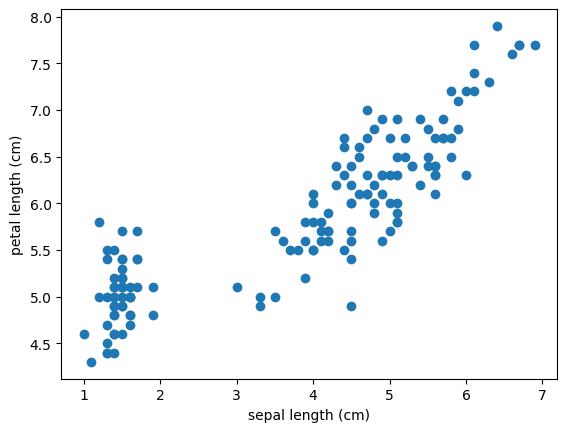

In [23]:
plt.scatter(df['petal length (cm)'], df['sepal length (cm)'])
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.show()

## Вывод

Для масштабирования данных я использовал функцию MinMaxScaler, позволяющую преобразовывать данные таким образом, чтобы они находились в диапазоне значений от 0 до 1, где 0 - это минимальное значение, а 1 - максимальное. Мотивация к использованию этого масштабирования включает устойчивость к очень небольшим стандартным отклонениям функций и сохранение нулевых записей в разреженных данных.

Для преобразования категориальных признаков я воспользовался двумя методами. LabelEncoder, который ориентирован на применение к одному признаку. Прежде всего он предназначен для кодирования целевого признака, но может быть также использован для последовательного кодирования отдельных нецелевых признаков. А также метод OneHotEncoder, который преобразует каждое уникальное значение признака в новый отдельный признак.